In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('Datasets/train_mnist.csv')
train.fillna(0, inplace=True)

In [4]:
def show_images(num_images):
    """This function plots the num_images provided of MNIST dataset.
    INPUT :: num_images - int - The number of images you would like to view.
    
    OUPUT :: A figure with the images shown for the training data"""
    
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0, num_images):
            plt.subplot(num_images/10, 10, digit_num+1) # Create Subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)
            plt.imshow(mat_data)
            plt.xticks([])
            plt.yticks([])
    else:
        print('That is not the right input, please read the docstring before continuing.')        

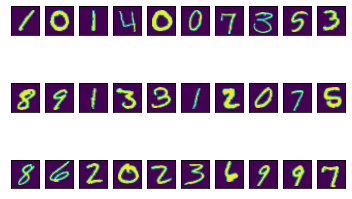

In [5]:
y = train['label']
X = train.drop('label', axis=1)

show_images(30)

In [6]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [7]:
pca, X_pca = do_pca(10, X)

In [8]:
pca.explained_variance_ratio_

array([0.06135278, 0.04292222, 0.04122265, 0.03205943, 0.02736554,
       0.02425956, 0.0201969 , 0.01905784, 0.01699737, 0.01529195])

In [9]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

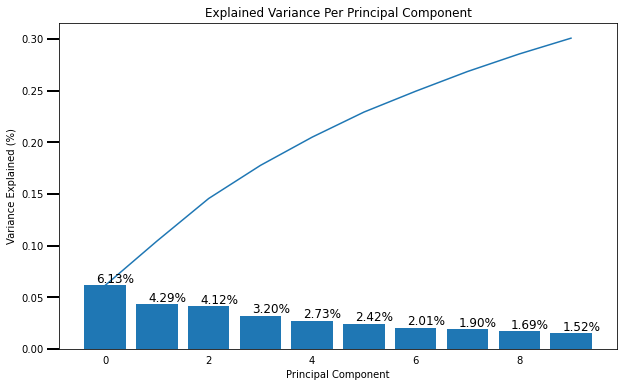

In [10]:
scree_plot(pca)

In [14]:
def plot_component(pca, comp):
    '''
    Plots an image associated with each component to understand how the weighting 
    of the components 
    INPUT: 
          pca - pca object created from PCA in sklearn
          comp - int - the component you want to see starting at 0
    OUTPUT
          None
    '''
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')

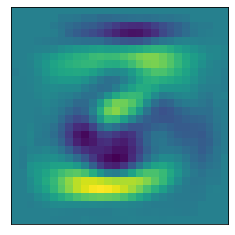

In [15]:
plot_component(pca, 3)

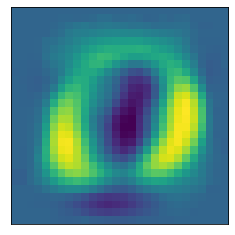

In [22]:
plot_component(pca, 0)

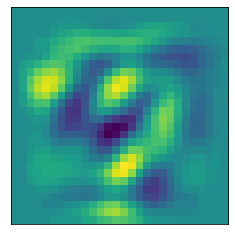

In [24]:
plot_component(pca, 7)